# Strat 3
- Make sure market is in an uptrend
- Quantify extreme MACD upthrusts
- Buy after upthrust just when MACD <0 OR somewhere down
- Set ptsl to half upthrust value

In [1]:
from binance.client import Client
from downloader import Downloader
import matplotlib.pyplot as plt
dl = Downloader()
import pandas as pd
import time
from datetime import datetime
import numpy as np
import statsmodels.formula.api as sm
import math
import metalabeller as ml

In [2]:
df = dl.get_working_data("ADAUSDT")

## Make sure market is in uptrend

In [3]:
# df_ = df.resample('1D').agg({'open': 'first', 
#                         'high': 'max', 
#                         'low': 'min', 
#                         'close': 'last',
#                         'volume':'sum'})

In [4]:
tp = 30*24*60

In [5]:
df_ = df
df_["mvg"] = df_["open"].ewm(span=tp, adjust=False).mean()
df_["mvgd"] = df_.mvg.diff()
df_["up"] = df[df.mvgd>0].open

In [6]:
df.mvgd.mean()

1.06414730661634e-06

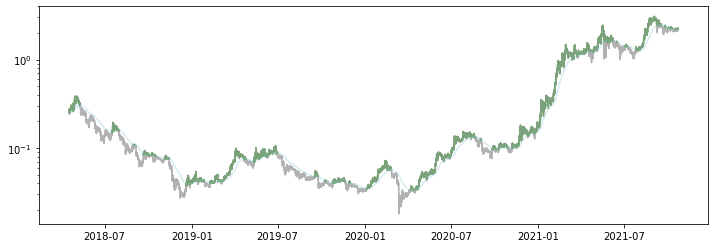

In [7]:
dfp = df_[:]
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_yscale('log')
ax.plot(dfp.open, c="black", alpha=0.3)
ax.plot(dfp.mvg, c="lightblue", alpha=0.5)
ax.plot(dfp.up, c="green", alpha=0.3)

## Quantify extreme MACD upthrusts

In [8]:
s = 12*60
l = 26*60

In [9]:
df_["m1"] = df_.open.ewm(span=s, adjust=False).mean()
df_["m2"] = df_.open.ewm(span=l, adjust=False).mean()
df_["macd"] = df_["m1"] - df_["m2"]

In [10]:
df_["up"] = df_[df_.macd>0].up

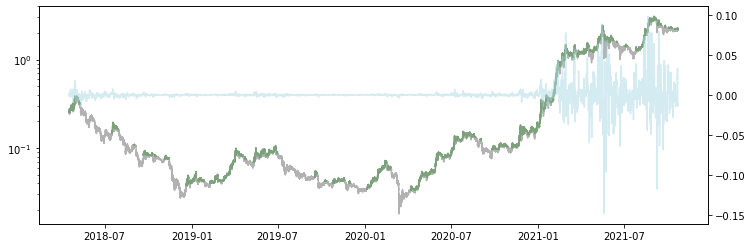

In [15]:
dfp = df_[:]
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_yscale('log')
ax.plot(dfp.open, c="black", alpha=0.3)
ax1 = ax.twinx()
ax1.plot(dfp.macd, c="lightblue", alpha=0.5)

ax.plot(dfp.up, c="green", alpha=0.3)

## Buy after upthrust at some MACD value or % value

## Set PTSL, T1, make events

## Calculate results

## Trial and Error

In [ ]:
# ATR
# high_low = df_['high'] - df_['low']
# high_close = np.abs(df_['high'] - df_['close'].shift())
# low_close = np.abs(df_['low'] - df_['close'].shift())

# ranges = pd.concat([high_low, high_close, low_close], axis=1)
# true_range = np.max(ranges, axis=1)

# atr = true_range.rolling(tp).sum()/tp

In [143]:
# # ADX indicator
# df_ = df
# df_["atr"] = atr
# df_["up"] = df_.high.shift(1)
# df_["up"] = df_.high-df_.up
# df_["down"] = df_.low.shift(1)
# df_["down"] = df_.down-df_.low
# df_["dmu"] = df_[(df["up"]>df["down"]) & (df["up"]>0)].up
# df_["dmd"] = df_[(df["down"]>df["up"]) & (df["down"]>0)].down
# df_.dmu.fillna(0, inplace=True)
# df_.dmd.fillna(0, inplace=True)
# df.dropna(inplace=True)
# df_["dmu"] = (df_.dmu/df_.atr).ewm(span=tp, adjust=False).mean()*100
# df_["dmd"] = (df_.dmd/df_.atr).ewm(span=tp, adjust=False).mean()*100
# df_["adx"] = (abs(df_.dmu-df_.dmd)/(df_.dmu+df_.dmd)).ewm(span=tp, adjust=False).mean()*100

# # df_["dmu"] = (df_.dmu/df_.atr).rolling(tp).mean()*100
# # df_["dmd"] = (df_.dmd/df_.atr).rolling(tp).mean()*100
# # df_["adx"] = (abs(df_.dmu-df_.dmd)/(df_.dmu+df_.dmd)).rolling(tp).mean()*100